# Задание 1

*Примечание: код для создания распределений взят из разбора практической работы №1*

1. Смоделировать 4 выборки объемом 1000 из разных законов распределения: нормальное, экспоненциальное, равномерное и любой другой закон распределения на выбор.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats 

In [2]:
normal_dist = stats.norm(loc=0, scale=1)
sample = normal_dist.rvs(size=1000)
sample

array([ 3.55809021e-01,  1.01121765e+00, -1.49934301e+00, -3.04386170e-01,
       -1.21154101e+00, -1.97141965e+00, -3.32097166e-01, -1.77533002e+00,
       -4.98021042e-01, -1.46644086e+00,  6.51837267e-01,  9.72347546e-02,
        1.31534656e-01,  7.45075231e-01,  6.64143210e-02, -2.63085317e-02,
       -6.61237121e-01,  2.79144014e-01, -2.72202847e+00,  8.40800771e-01,
       -8.26807874e-01,  3.53945015e-01,  1.37204873e+00, -4.86197685e-01,
        1.21442753e+00,  3.20512912e+00,  1.26962964e+00, -7.24028568e-01,
        8.82365936e-01, -6.80461781e-01, -2.73859029e+00,  9.49608677e-01,
        1.68811148e-01, -5.00123243e-01, -1.97361253e+00, -1.79401443e+00,
       -3.38422807e-01, -1.72528668e-02, -3.46695727e+00,  1.22890463e+00,
        6.35810620e-01, -5.10638370e-01,  5.82068070e-01,  1.20199397e+00,
        7.51656506e-01,  1.13545525e+00, -2.68637530e+00, -2.62902763e-02,
       -1.75319939e-01, -3.73249958e-01,  3.27524681e-01,  4.29977367e-01,
        2.07867647e+00, -

2. Для каждой выборки посчитать описательные характеристики (минимум и максимум, мат. ожидание, дисперсия, стандартное отклонение, квантили уровней 0.25 и 0.75, размах, медиана, коэффициенты асимметрии и эксцесса). 

In [3]:
def calc_descriptive_characteristics(distribution, sample):
    min_value = np.min(sample) # минимум
    max_value = np.max(sample) # максимум
    avg_value = sample.mean() # мат. ожидание
    var_value = sample.var() # дисперсия
    std_value = sample.std() # среднее квадратичное отклонение
    quartiles = np.quantile(sample, [0.25, 0.75])
    q25_value = quartiles[0] # 0.25-квантиль
    q75_value = quartiles[1] # 0.75-квантиль
    rng_value = np.ptp(sample) # размах
    mdn_value = np.median(sample) # медиана
    skw_value = stats.skew(sample) # коэффициент ассиметрии
    krt_value = stats.kurtosis(sample) # эксцесс
    
    return {'distribution': distribution, # распределение
            'min':min_value, # минимум
            'max':max_value, # максимум
            'avg':avg_value, # мат. ожидание
            'var':var_value, # дисперсия
            'std':std_value, # среднее квадратичное отклонение
            'q25':q25_value, # 0.25-квантиль 
            'q75':q75_value, # 0.75-квантиль
            'rng':rng_value, # размах 
            'mdn':mdn_value, # медиана
            'skw':skw_value, # коэффициент ассиметрии
            'krt':krt_value, # эксцесс
           }

In [4]:
res = calc_descriptive_characteristics("Нормальное", sample)
res

{'distribution': 'Нормальное',
 'min': -3.4669572740798738,
 'max': 3.205129119752718,
 'avg': -0.03473697997588998,
 'var': 0.9886891842663939,
 'std': 0.9943285092294165,
 'q25': -0.7159068729729184,
 'q75': 0.6566745915918738,
 'rng': 6.672086393832592,
 'mdn': -0.03737220318579537,
 'skw': -0.04626459998692433,
 'krt': 0.1854882488218883}

3. Создать pandas.DataFrame с полученными в п. 2 значениями.

In [5]:
data = {
    'distribution': [],
    'min': [],
    'max': [],
    'avg': [],
    'var': [],
    'std': [],
    'q25': [],
    'q75': [],
    'range': [],
    'median': [],
    'skewness': [],
    'kurtosis': []
}
df = pd.DataFrame(data)
df

,distribution,min,max,avg,var,std,q25,q75,range,median,skewness,kurtosis


In [6]:
df.loc[0] = res
df

,distribution,min,max,avg,var,std,q25,q75,range,median,skewness,kurtosis
0,Нормальное,-3.466957,3.205129,-0.034737,0.988689,0.994329,-0.715907,0.656675,NaN,NaN,NaN,NaN


4. Сохранить pandas.DataFrame в файл task_1.csv

In [7]:
df.to_csv('task_1.csv')

# Задание 2

1. Загрузить файл titanic.csv

In [8]:
df = pd.read_csv('titanic.csv', delimiter=',')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


2. С помощью describe() и info() вывести основную информацию.

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


3. Указать в качестве индекса столбец PassengerId.

In [11]:
df.set_index('PassengerId', inplace=True)

In [12]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


4. Преобразовать столбец Sex в числовые значения – 0 и 1 для Male и Female соответственно.

In [13]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S


5. Сделать сортировку по столбцу Sex по возрастанию и Age по убыванию. Вывести первые 10 и последние 10 строк.

In [14]:
sorted_dt = df.sort_values(by=['Sex', 'Age'], ascending=[True, False])
sorted_dt.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",0,80.0,0,0,27042,30.0000,A23,S
852,0,3,"Svensson, Mr. Johan",0,74.0,0,0,347060,7.7750,NaN,S
97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,A5,C
494,0,1,"Artagaveytia, Mr. Ramon",0,71.0,0,0,PC 17609,49.5042,NaN,C
117,0,3,"Connors, Mr. Patrick",0,70.5,0,0,370369,7.7500,NaN,Q
673,0,2,"Mitchell, Mr. Henry Michael",0,70.0,0,0,C.A. 24580,10.5000,NaN,S
746,0,1,"Crosby, Capt. Edward Gifford",0,70.0,1,1,WE/P 5735,71.0000,B22,S
34,0,2,"Wheadon, Mr. Edward H",0,66.0,0,0,C.A. 24579,10.5000,NaN,S
55,0,1,"Ostby, Mr. Engelhart Cornelius",0,65.0,0,1,113509,61.9792,B30,C


In [15]:
sorted_dt.tail(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
613,1,3,"Murphy, Miss. Margaret Jane",1,NaN,1,0,367230,15.5000,NaN,Q
654,1,3,"O'Leary, Miss. Hanora ""Norah""",1,NaN,0,0,330919,7.8292,NaN,Q
670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",1,NaN,1,0,19996,52.0000,C126,S
681,0,3,"Peters, Miss. Katie",1,NaN,0,0,330935,8.1375,NaN,Q
698,1,3,"Mullens, Miss. Katherine ""Katie""",1,NaN,0,0,35852,7.7333,NaN,Q
728,1,3,"Mannion, Miss. Margareth",1,NaN,0,0,36866,7.7375,NaN,Q
793,0,3,"Sage, Miss. Stella Anna",1,NaN,8,2,CA. 2343,69.5500,NaN,S
850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",1,NaN,1,0,17453,89.1042,C92,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,NaN,8,2,CA. 2343,69.5500,NaN,S


6. Удалить строки, содержащие хотя бы одно значение NaN.

In [16]:
df.dropna(inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

7. Сохранить результат в файл prepared_task_2.xlsx.

In [17]:
df.to_excel('prepared_task_2.xlsx', index=True)

# Задание 3 (со звёздочкой)

1. Загрузить файл prepared_task_2.xlsx, полученный в задании №2.

In [18]:
import matplotlib.pyplot as plt

#загрузка файла 
df = pd.read_excel('prepared_task_2.xlsx', index_col='PassengerId')

In [19]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.0,1,1,11751,52.5542,D35,S
873,0,1,"Carlsson, Mr. Frans Olof",0,33.0,0,0,695,5.0000,B51 B53 B55,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56.0,0,1,11767,83.1583,C50,C


2. Визуализировать с помощью графиков значения полученного датафрейма.

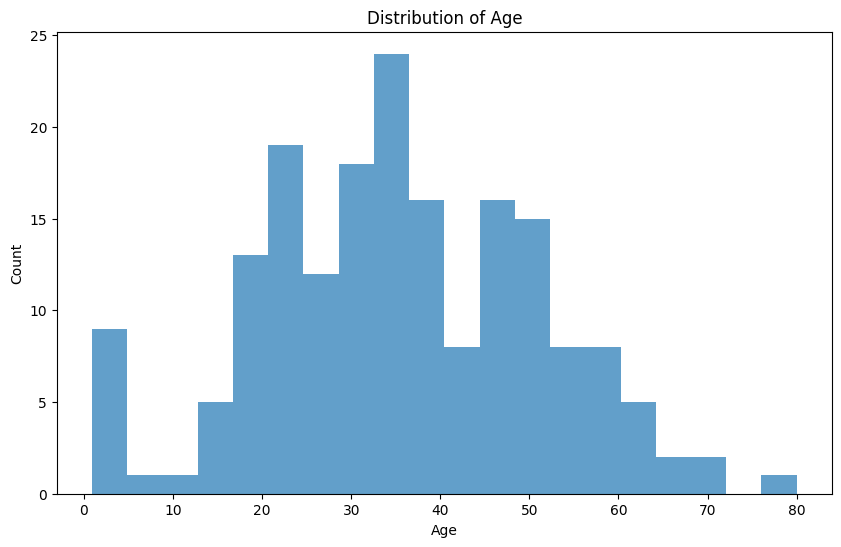

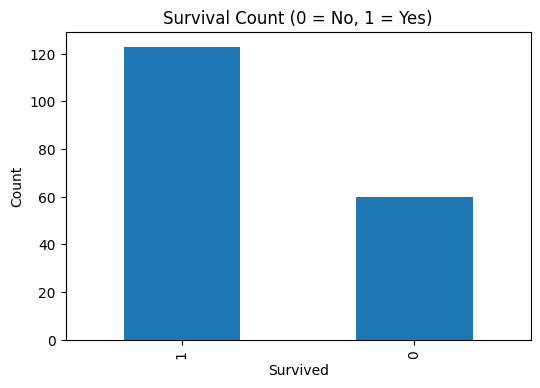

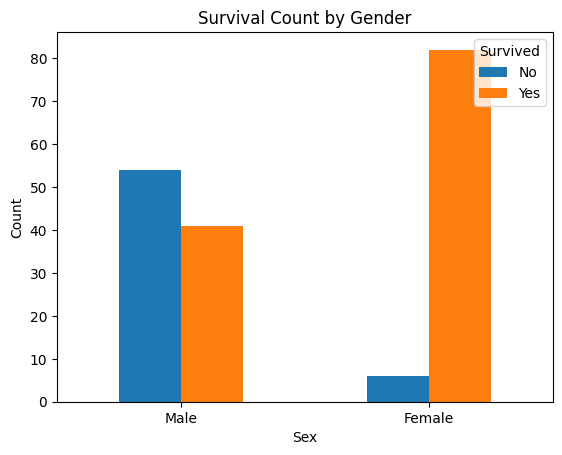

In [20]:
#строим гистограмму для возраста
plt.figure(figsize=(10, 6))
df['Age'].plot(kind='hist', bins=20, alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#для количества выживших пассажиров
plt.figure(figsize=(6, 4))
df['Survived'].value_counts().plot(kind='bar')
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

#подсчет выживших по полу
survived_mapping = {0: 'No', 1: 'Yes'}
df['Survived_Label'] = df['Survived'].map(survived_mapping)
survival_by_sex = df.groupby('Sex')['Survived_Label'].value_counts().unstack()

#гистограмма для пола
survival_by_sex.plot(kind='bar')
plt.title('Survival Count by Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.legend(title='Survived', loc='upper right')
plt.show()

3. Посчитать количество выживших пассажиров (в столбце Survived должна быть единица).

In [21]:
survived_count = df['Survived'].sum()
survived_count

123

4. Сделать группировку по столбцу Embarked и вывести средние значения Age, SibSp, Parch и Survived для каждой группы.

In [22]:
df.groupby('Embarked').agg({'Age': 'mean', 'SibSp': 'mean', 'Parch': 'mean', 'Survived': 'mean'}).reset_index()

,Embarked,Age,SibSp,Parch,Survived
0,C,37.461538,0.415385,0.400000,0.738462
1,Q,38.500000,1.500000,0.000000,0.500000
2,S,34.624310,0.474138,0.525862,0.637931
